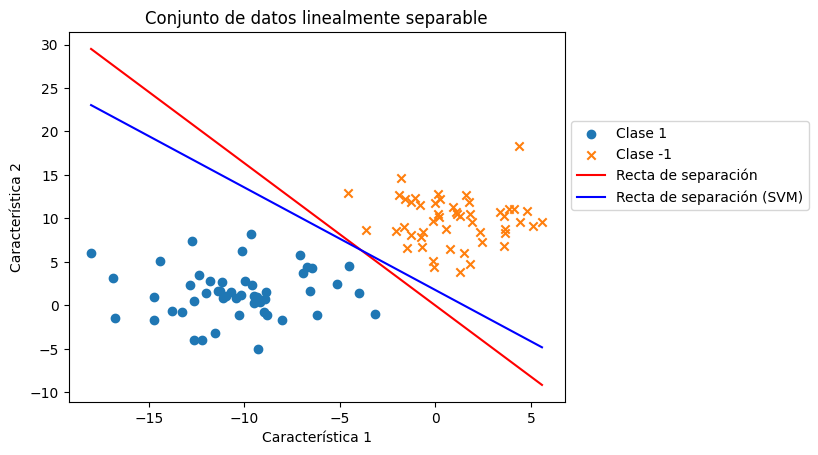

In [221]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC

# Generar un conjunto de datos linealmente separable
X, y = make_blobs(n_samples=100, n_features=2, centers=2,cluster_std=3.0)

# Cambiar las etiquetas de clase a 1 y -1
y[y == 0] = -1

# Crear un clasificador de perceptrón
clf = Perceptron(max_iter=100, random_state=0)

# Entrenar el perceptrón en el conjunto de datos
clf.fit(X, y)

# Crear un clasificador de SVM (Support Vector Machine)
svm = SVC(kernel='linear', C=1e3)  # Usar un kernel lineal y un valor alto de C
svm.fit(X, y)

# Coeficientes del hiperplano (línea) que separa las clases
coef = clf.coef_[0]
intercept = clf.intercept_[0]

# Obtener los coeficientes del hiperplano del SVM
svm_coef = svm.coef_[0]
svm_intercept = svm.intercept_[0]


# Visualizar el conjunto de datos y la recta de separación
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Clase 1', marker='o')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='Clase -1', marker='x')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.title('Conjunto de datos linealmente separable')

# Dibujar la recta de separación
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = (-coef[0] / coef[1]) * x_values - (intercept / coef[1])
plt.plot(x_values, y_values, label='Recta de separación', color='red')

# Dibujar la recta de separación del SVM
svm_line = (-svm_coef[0] / svm_coef[1]) * x_values - (svm_intercept / svm_coef[1])
plt.plot(x_values, svm_line, label='Recta de separación (SVM)', color='blue')

plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5))
plt.show()
